In [61]:
import pandas as pd
names=['username', 'uploads', 'subs', 'views', 'instafollowers', 
       'instafollowing', 'instaposts', 'twitfollowers', 'tweets', 'twitlikes']
data = pd.read_csv('Dataset.csv', sep=';', header=None, names=names)
data = data[data.ne('--').all(1)]
for nm in names[1:]:
    data[nm] = data[nm].apply(lambda x: x.replace(',','') if isinstance(x, str) else x)
    data[nm] = data[nm].apply(lambda x: round(float(x)) if isinstance(x, str) else x)
    data[nm] = data[nm].apply(lambda x: int(x))

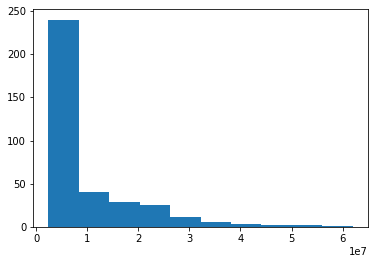

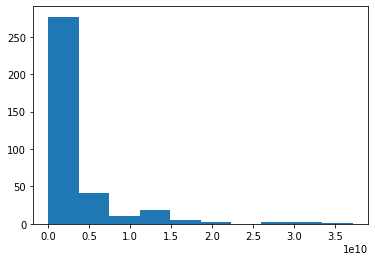

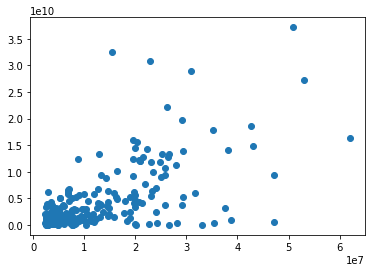

In [63]:
from matplotlib import pyplot as plt
plt.hist(data.subs)
plt.show();
plt.hist(data.views)
plt.show();
plt.scatter(data.subs, data.views)
plt.show();

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-306775810.38293076

9.231444405300388e+18

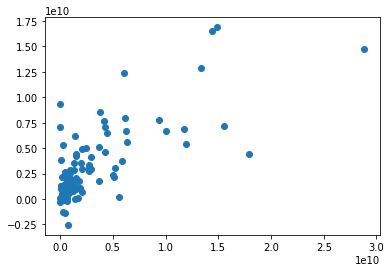

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

reorder=['username', 'views', 'uploads', 'subs', 'instafollowers', 
       'instafollowing', 'instaposts', 'twitfollowers', 'tweets', 'twitlikes']
data = data[reorder]
X = data.iloc[:, 2:].values
Y = data.iloc[:, 1].values

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3)

linreg = LinearRegression()
linreg.fit(train_X, train_Y)

linreg_pred = linreg.predict(test_X)
metrics.mean_squared_error(test_Y, linreg_pred)

plt.scatter(test_Y, linreg_pred)
plt.show()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

1.275690433398058e+19

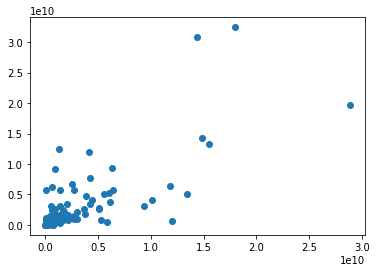

In [86]:
from sklearn import tree

dectree = tree.DecisionTreeRegressor()
dectree.fit(train_X, train_Y)

dectree_pred = dectree.predict(test_X)
metrics.mean_squared_error(test_Y, dectree_pred)

plt.scatter(test_Y, dectree_pred)
plt.show()